In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn_extra.cluster import KMedoids  # PAM


import warnings

warnings.filterwarnings("ignore")

encoder = OrdinalEncoder()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = [15, 7]

In [8]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(columns="customerID")
data.drop_duplicates(inplace=True)
data.drop("TotalCharges", axis=1, inplace=True)
nominal_features = ("PaperlessBilling", "Dependents", "Partner", "Churn")
for feature in nominal_features:
    data[feature] = data[feature].map({"Yes": 1, "No": 0})

data = pd.get_dummies(
    data,
    columns=[
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaymentMethod",
    ],
)

# No internet service column has the same values (we checked it before) for OnlineSecurity, OnlineBackup, DeviceProtection,
# TechSupport, StreamingTV and StreamingMovies

data.drop(
    columns=[
        "OnlineSecurity_No internet service",
        "OnlineBackup_No internet service",
        "DeviceProtection_No internet service",
        "TechSupport_No internet service",
        "StreamingTV_No internet service",
        "StreamingMovies_No internet service",
    ],
    inplace=True,
)
    
df_cluster = data.copy()
scaler = StandardScaler()
df_cluster[["tenure", "MonthlyCharges"]] = scaler.fit_transform(
    df_cluster[["tenure", "MonthlyCharges"]]
)

df_cluster[
    df_cluster.columns[~df_cluster.columns.isin(["tenure", "MonthlyCharges"])]
] = encoder.fit_transform(
    df_cluster[
        df_cluster.columns[~df_cluster.columns.isin(["tenure", "MonthlyCharges"])]
    ]
)
# take data without churn columns:
df_cluster = df_cluster[df_cluster.columns[:-1]]



In [9]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,No,No phone service,1,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,Yes,No,0,56.95,0,...,0,1,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,Yes,No,1,53.85,1,...,0,1,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,No,No phone service,0,42.30,0,...,0,1,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,Yes,No,1,70.70,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,Yes,Yes,1,84.80,0,...,1,0,1,0,1,0,0,0,0,1
7039,Female,0,1,1,72,Yes,Yes,1,103.20,0,...,1,0,1,0,1,0,0,1,0,0
7040,Female,0,1,1,11,No,No phone service,1,29.60,0,...,0,1,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,Yes,Yes,1,74.40,1,...,0,1,0,1,0,0,0,0,0,1


In [3]:
df_cluster

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.0,1.0,0.0,-1.282728,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.164135
1,1.0,0.0,0.0,0.0,0.062387,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.262811
2,1.0,0.0,0.0,0.0,-1.241967,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.365914
3,1.0,0.0,0.0,0.0,0.510759,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.750058
4,0.0,0.0,0.0,0.0,-1.241967,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.194503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,-0.345224,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.663458
7039,0.0,0.0,1.0,1.0,1.611307,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.275428
7040,0.0,0.0,1.0,1.0,-0.875118,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.172450
7041,1.0,1.0,1.0,0.0,-1.160445,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.317562


# Dimension Reduction

We would like to cover 90% of original variance

## MDS

In [10]:
from sklearn.manifold import MDS

In [21]:
# Gower's matrix?

In [11]:
mds_transform = MDS(n_components=10)
mds = mds_transform.fit_transform(df_cluster)

In [15]:
mds.shape

(7021, 10)

In [18]:
pd.DataFrame(mds).to_csv('mds.csv')

In [46]:
exp_var_mds = mds_transform.explained_variance_ratio_
cum_sum_eigenvalues_mds = np.cumsum(exp_var_mds)

plt.bar(range(1,len(exp_var_mds)+1), exp_var_mds, align='center', label='Individual explained variance')
plt.plot(range(1,len(cum_sum_eigenvalues_mds)+1), cum_sum_eigenvalues_mds, label='Cumulative explained variance', color='orange')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

AttributeError: 'MDS' object has no attribute 'explained_variance_ratio_'

## PCA

In [12]:
from sklearn.decomposition import PCA

In [27]:
pca_transform = PCA()
pca = pca_transform.fit_transform(df_cluster)


In [28]:
pca

array([[-1.47166406e+00, -9.98167287e-01, -7.83893933e-01, ...,
        -4.48116871e-16, -2.81884704e-15,  1.80631536e-16],
       [-8.05047452e-01,  3.04437254e-01,  7.30326565e-01, ...,
         1.20440132e-15, -1.55302322e-15, -8.80290098e-16],
       [-1.47755713e+00, -1.01624768e+00,  4.38330704e-01, ...,
        -3.09112231e-16, -1.70071462e-15, -2.68843252e-16],
       ...,
       [-1.41322364e+00, -5.96695171e-01, -7.35402198e-01, ...,
        -4.34174979e-17, -1.26221710e-16, -3.10789048e-18],
       [-5.33959952e-02, -2.00438597e+00, -1.31139155e+00, ...,
         6.10092720e-17, -2.94717191e-17,  1.45083583e-16],
       [ 1.70284291e+00,  8.66378728e-01,  1.88706745e+00, ...,
        -1.62566556e-16, -3.68055309e-17, -6.50850748e-17]])

In [24]:
pd.DataFrame(pca).to_csv('pca.csv')

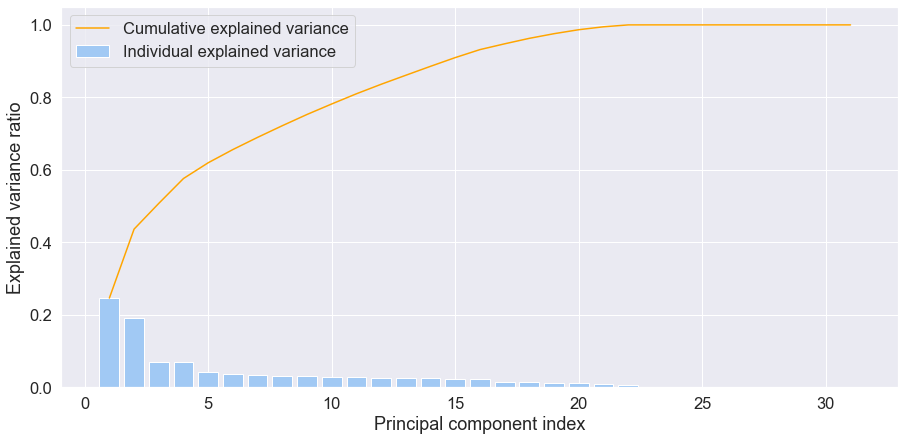

In [47]:
exp_var_pca = pca_transform.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, align='center', label='Individual explained variance')
plt.plot(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, label='Cumulative explained variance', color='orange')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.show()

In [45]:
cum_sum_eigenvalues[10]   # 11th > 80

0.8099435055299056

In [60]:
pca = pca[:, :10]
pca.shape

(7021, 10)

## Clusterization after dimension reduction

### Metoda Silhouette


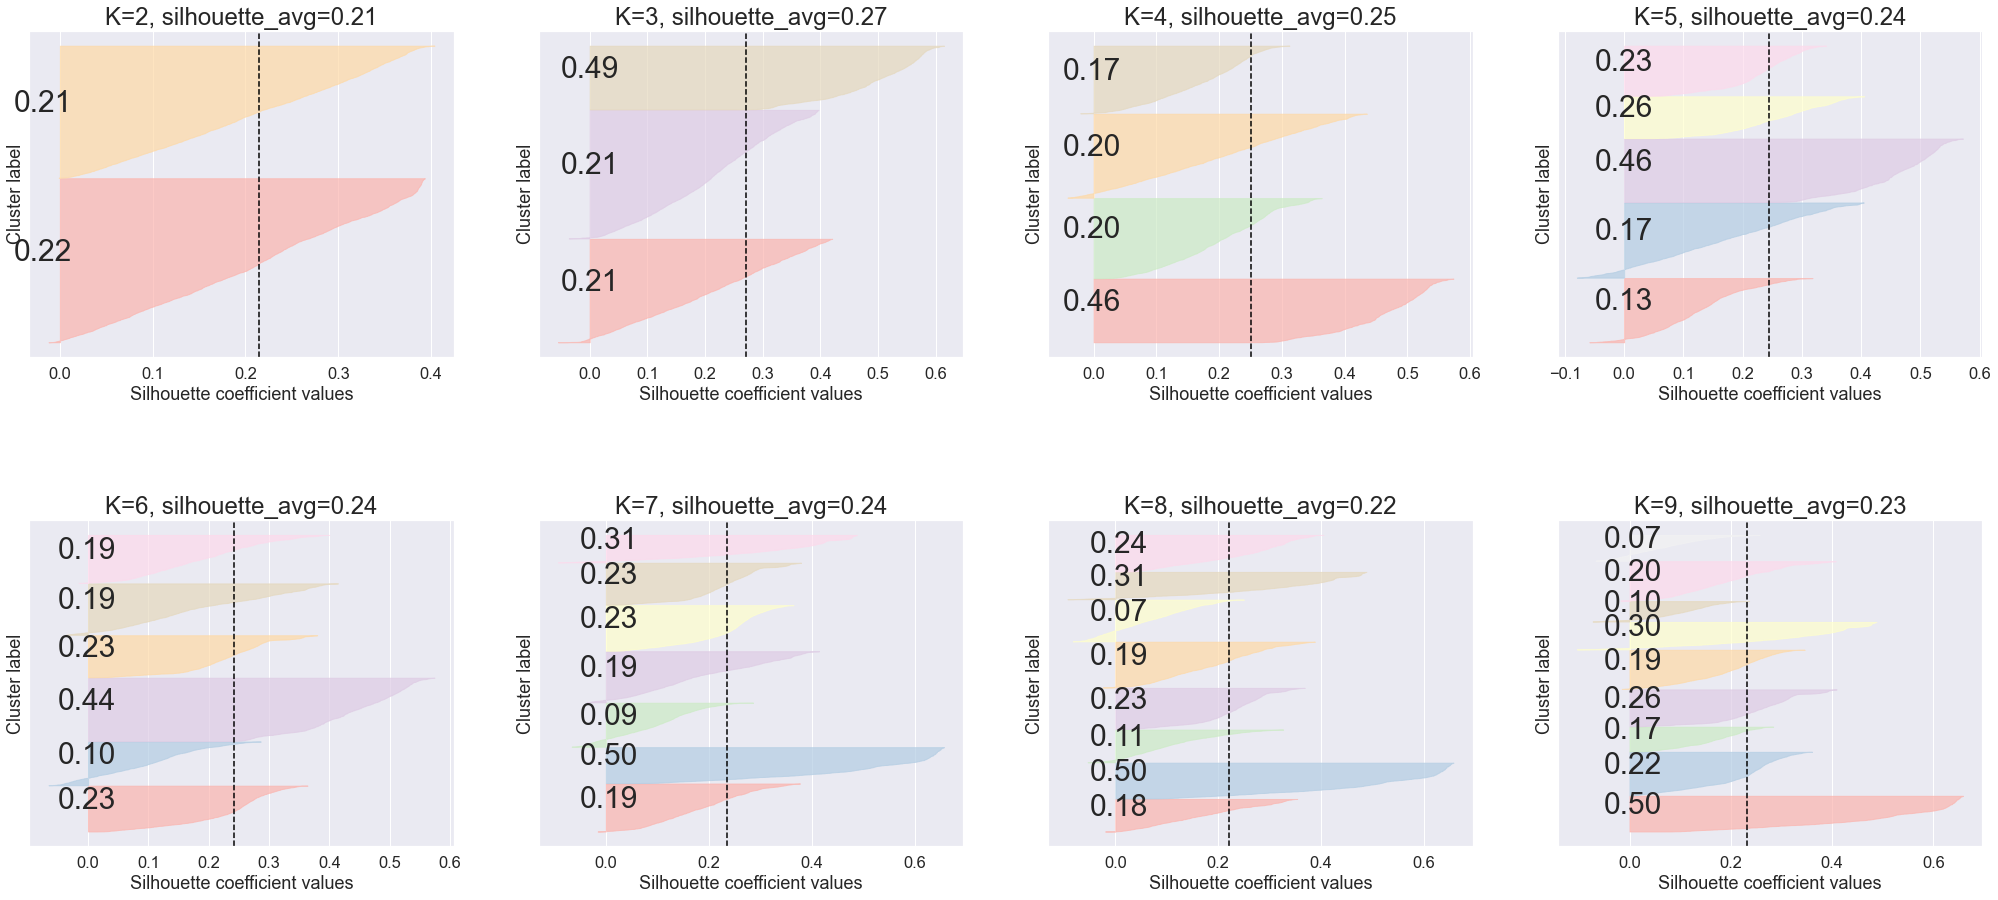

In [61]:
def optimise_k_means_silhouette_score(data, max_k):
    means = []
    silhouette = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        silhouette.append(silhouette_score(data, kmeans.labels_))

    plt.plot(means, silhouette, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Average Silhouette Score")
    plt.grid(True)
    plt.savefig("images_clustering/silhouette_score.pdf")
    plt.show()
    
k_values = range(2, 10)
pastel_cmap = plt.get_cmap("Pastel1")
fig, axs = plt.subplots(2, 4, figsize=(35, 15))
fig.subplots_adjust(hspace=0.5)
axs = axs.flatten()
table = []
for idx, k in enumerate(k_values):
    plt.sca(axs[idx])
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca)
    silhouette_avg = silhouette_score(pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(pca, cluster_labels)
    y_lower = 10
    table.append(silhouette_avg)

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = pastel_cmap(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            f"{ith_cluster_silhouette_values.mean():.2f}",
        )  # Write silhouette coefficient value
        y_lower = y_upper + 10
    plt.title(f"K={k}, silhouette_avg={np.round(silhouette_avg, 2)}", fontsize=24)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="black", linestyle="--")
    plt.yticks([])
    plt.savefig("images_clustering/silhouette_scoresPCA.pdf")

In [62]:
pd.DataFrame(table, index=k_values, columns=["Silhouette Score"])

,Silhouette Score
2,0.214161
3,0.271306
4,0.251341
5,0.244387
6,0.241481
7,0.235314
8,0.221441
9,0.232577


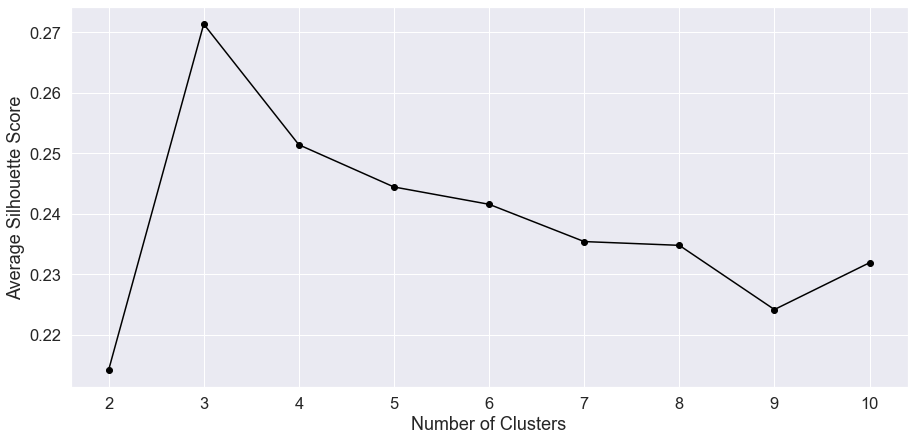

In [63]:
optimise_k_means_silhouette_score(pca, 10)

### Metoda Daviesa-Bouldina

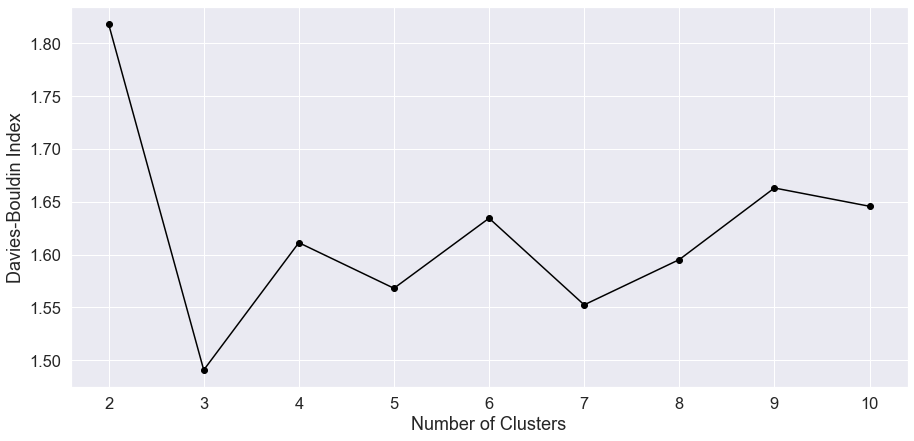

In [64]:
def optimise_k_means_davies_bouldin(data, max_k):
    davies_bouldin_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        db_index = davies_bouldin_score(data, kmeans.labels_)
        davies_bouldin_scores.append(db_index)

    plt.plot(range(2, max_k + 1), davies_bouldin_scores, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Davies-Bouldin Index")
    plt.grid(True)
    plt.savefig("images_clustering/davies_bouldinPCA.pdf")
    plt.show()
optimise_k_means_davies_bouldin(pca, 10)

### calinski Harabasz

For n_clusters = 2, Calinski-Harabasz Index is 2048.4731649231726
For n_clusters = 3, Calinski-Harabasz Index is 2366.4008935829124
For n_clusters = 4, Calinski-Harabasz Index is 2093.517126389395
For n_clusters = 5, Calinski-Harabasz Index is 1873.119320467473
For n_clusters = 6, Calinski-Harabasz Index is 1750.2369104499721
For n_clusters = 7, Calinski-Harabasz Index is 1669.3571972042325
For n_clusters = 8, Calinski-Harabasz Index is 1534.5574557920722
For n_clusters = 9, Calinski-Harabasz Index is 1453.9735603179226
For n_clusters = 10, Calinski-Harabasz Index is 1365.344619878393
The best number of clusters is 3 based on Calinski-Harabasz Index.


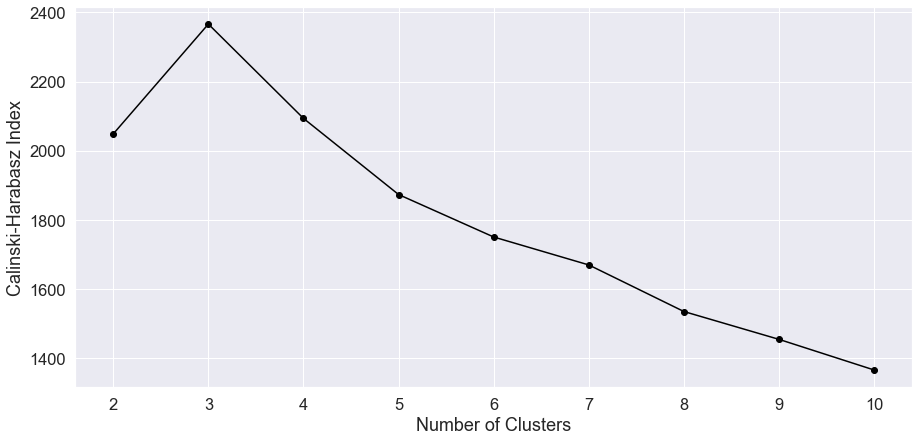

3

In [65]:
def optimise_k_means_calinski_harabasz(data):
    ch_index_values = []
    k_values = range(2, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        ch_index = calinski_harabasz_score(data, cluster_labels)
        ch_index_values.append(ch_index)
        print(f"For n_clusters = {k}, Calinski-Harabasz Index is {ch_index}")

    best_k = k_values[np.argmax(ch_index_values)]
    print(f"The best number of clusters is {best_k} based on Calinski-Harabasz Index.")

    plt.plot(k_values, ch_index_values, "o-", color="black")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Calinski-Harabasz Index")
    plt.grid(True)
    plt.savefig("images_clustering/calinski_harabaszPCA.pdf")
    plt.show()

    return best_k

optimise_k_means_calinski_harabasz(pca)

### Analiza Hierarchiczna:


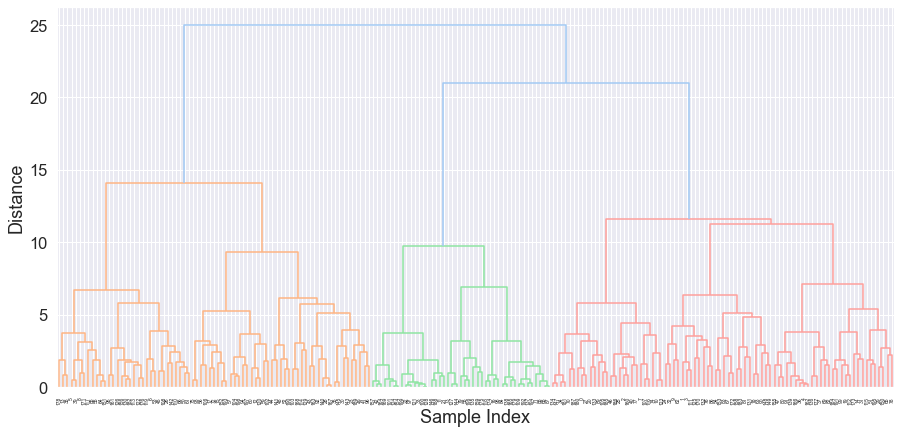

In [66]:
linkage_matrix = linkage(
    pca[:200], method="ward"
)  # dałam okrojony zbiór, bo inaczej za długo liczyło
dendrogram(linkage_matrix)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.savefig("images_clustering/dendrogramPCA.pdf")
plt.show()

### Wizualizacja

In [67]:
pca.shape

(7021, 10)

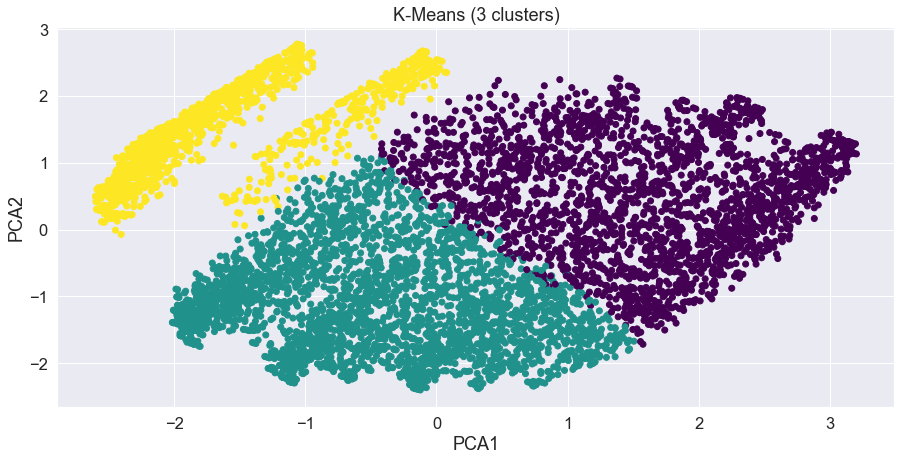

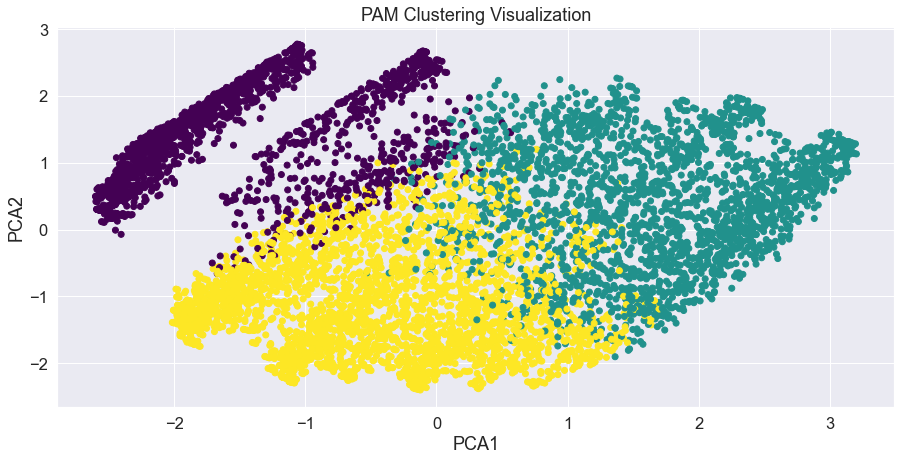

Text(0.5, 1.0, 'Agglomerative Clustering Visualization')

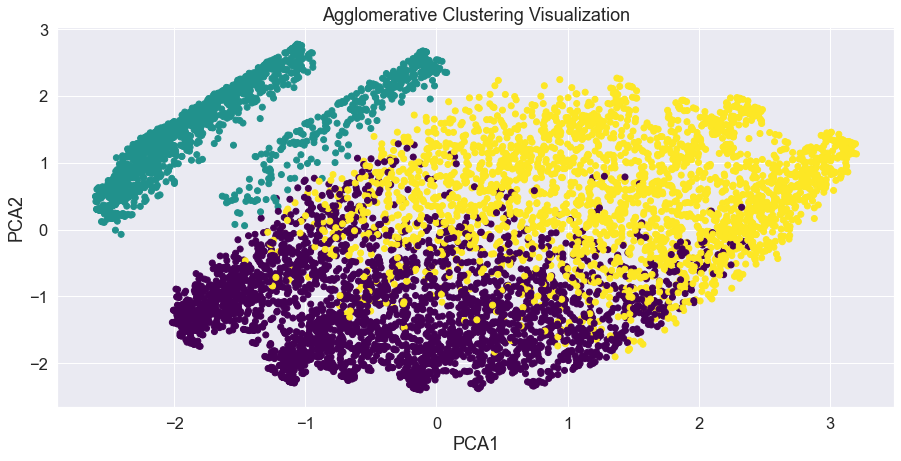

In [78]:
# fig, axs = plt.subplots(1, 3, figsize=(25, 25))
# change fontsize for titles
# plt.rcParams.update({"font.size": 30})


kmeans = KMeans(n_clusters=3)

kmeans.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=kmeans.labels_, cmap="viridis"
)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means (3 clusters)")
plt.show()

# # PAM with 3 clusters
PAM = KMedoids(n_clusters=3)
PAM.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=PAM.labels_, cmap="viridis"
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PAM Clustering Visualization")
plt.show()

# # Agglomerative with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca)
plt.scatter(
    pca[:, 0], pca[:, 1], c=agg.labels_, cmap="viridis"
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Agglomerative Clustering Visualization")

# plt.savefig("images_clustering/clustering_visualizationPCA.pdf")